### Problem Statement

Problem Statement: Development of an advanced sentiment analysis pipeline to analyze cryptocurrency-related discussions from social media platforms, especially Reddit. Accurate, comprehensive, and scalable sentiment analysis is critical to various downstream analytical applications.

### Loading Data

Since we do not have the data in a csv and to make sure we do not face any security risk loading the data, also the user who will verify should also not get any issues accessing data we have used gdown to pin point using ID of file rather than login through drive

In [2]:
!pip install gdown

In [3]:
!gdown --id 1D5XjGR3F9QsVf6jCvAE6Ck8jWFup-qGI

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1D5XjGR3F9QsVf6jCvAE6Ck8jWFup-qGI
To: /content/crypto_currency_sentiment_dataset.csv
100% 205k/205k [00:00<00:00, 109MB/s]


In [4]:
!ls

crypto_currency_sentiment_dataset.csv  sample_data


### Reading and Understandin Data

In [5]:
import pandas as pd
pd.set_option('display.max_colwidth',None)
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
crypto_data=pd.read_csv('/content/crypto_currency_sentiment_dataset.csv')

In [6]:
crypto_data.head()

,user_id,Comment,Sentiment,Reddit URL
0,XYNN2Y4VCF3G,"I bought 2200 at the ico, at 0.50$ per coin. Hold everything and sold it 3 months ago and it helped me to buy a bigger house.",Positive,https://www.reddit.com/r/Avax/comments/uzggar/comment/iabc390/?utm_source=reddit&utm_medium=web2x&context=3
1,DR6XNZMT9KRH,"Harmony one , algorand , Cardano, solana , vechain gonna fly if there is ever a next bull market\n\nOtherwise just buy and stack satoshis",Positive,https://www.reddit.com/r/CryptoCurrency/comments/v09a1p/comment/iag2c78/?utm_source=reddit&utm_medium=web2x&context=3
2,9FCQGMYD4A42,"Honestly, after reading this post and many of the responses, I have to conclude most of the crypto-space is totally fucked.\n\nThe consept of crypto has been entirely lost, waves of noobs arrive on crypto island, and instead of revelling in the freedom, do everything they can to plan their way to get back off of the island.",Negative,https://www.reddit.com/r/CryptoCurrency/comments/uijvn6/its_annoying_to_see_bitcoin_follows_the_stock/
3,QEZAEMV2WF9D,In bear market is where money is made. I Will continue to DCA to the assets i believe.,Positive,https://www.reddit.com/r/CryptoCurrency/comments/uzwmf6/comment/iacwnpv/?utm_source=reddit&utm_medium=web2x&context=3
4,Z7J7W3XCP4XC,"Funny how people think Bitcoin's risk is comparable to stocks. A lot of these crypto ""investors"" are gonna learn the hard way sooner or later.",Negative,https://www.reddit.com/r/investing/comments/um4inc/bitcoin_tumbles_more_than_50_below_its_alltime/


In [7]:
crypto_data.describe()

,user_id,Comment,Sentiment,Reddit URL
count,562,562,562,562
unique,260,552,2,464
top,TRZKH4HK4646,BTC should be in everyone’s Portfolio,Positive,https://www.reddit.com/r/investing/comments/um4inc/bitcoin_tumbles_more_than_50_below_its_alltime/
freq,5,2,302,9


This is quite new, the comment folder says its unique are 10 less than total comments so lets see whats the picture here

In [8]:
crypto_data[crypto_data.Comment.duplicated(keep=False)].sort_values('Comment')

,user_id,Comment,Sentiment,Reddit URL
487,FDNCJD3AMXMX,BTC should be in everyone’s Portfolio,Positive,https://www.reddit.com/r/CryptoCurrency/comments/v09a1p/comment/iaf0kgg/?utm_source=reddit&utm_medium=web2x&context=3
483,XWGPHPXCAYDA,BTC should be in everyone’s Portfolio,Positive,https://www.reddit.com/r/CryptoCurrency/comments/v09a1p/comment/iaf0kgg/?utm_source=reddit&utm_medium=web2x&context=3
517,MRVNFNWJW9AR,"Good, cheaper Bitcoin",Positive,https://www.reddit.com/r/CryptoCurrency/comments/v0c2gq/comment/iafxnd2/?utm_source=reddit&utm_medium=web2x&context=3
545,WKVZK2N4J3MC,"Good, cheaper Bitcoin",Positive,https://www.reddit.com/r/CryptoCurrency/comments/v0c2gq/comment/iafxnd2/?utm_source=share&utm_medium=web2x&context=3
20,DCRRXJFVW7R3,"I'm super bullish on dot. My best hold imho. Love the team, love the tech, and the ecosystem is growing at a nice pace. For instance, I've been tinkering with parallel finance lately and I really like it. I think we're going to see great things from polkadot in the future.\n\nGood luck to all dot holders out there!",Positive,https://www.reddit.com/r/CryptoCurrency/comments/uzo2xf/comment/iabha76/?utm_source=share&utm_medium=web2x&context=3
416,DR6XNZMT9KRH,"I'm super bullish on dot. My best hold imho. Love the team, love the tech, and the ecosystem is growing at a nice pace. For instance, I've been tinkering with parallel finance lately and I really like it. I think we're going to see great things from polkadot in the future.\n\nGood luck to all dot holders out there!",Positive,https://www.reddit.com/r/CryptoCurrency/comments/uzo2xf/comment/iabha76/?utm_source=reddit&utm_medium=web2x&context=3
81,PFERAMNPAJQR,"If going long term, BTC and ETH are the coins to buy imo",Positive,https://www.reddit.com/r/CryptoCurrency/comments/v09a1p/comment/iaf481x/?utm_source=reddit&utm_medium=web2x&context=3
149,WXXW646EHXPR,"If going long term, BTC and ETH are the coins to buy imo",Positive,https://www.reddit.com/r/CryptoCurrency/comments/v09a1p/comment/iaf481x/?utm_source=reddit&utm_medium=web2x&context=3
204,ENWH4VP2V3CW,It's going on sale! I'm gonna get so fat on bitcoin that when I sell it people are going to call me a whale!,Positive,https://www.reddit.com/r/CryptoCurrency/comments/uz3agj/bitcoin_finally_decouples_from_the_stock_market/
163,QQYCQPQK6WFA,It's going on sale! I'm gonna get so fat on bitcoin that when I sell it people are going to call me a whale!,Positive,https://www.reddit.com/r/CryptoCurrency/comments/uz3agj/bitcoin_finally_decouples_from_the_stock_market/ia8c9zg/?utm_source=share&utm_medium=ios_app&utm_name=iossmf&context=3


Okay! so two things can be seen


1.   First- the comments are duplicated which means they may not be super useful
2.   Second- Some comments are very short so they might prove to be difficult to handle later on



#### Lets handle the First point

In [9]:
crypto_data=crypto_data.drop_duplicates(subset='Comment')

In [10]:
crypto_data.describe()

,user_id,Comment,Sentiment,Reddit URL
count,552,552,552,552
unique,260,552,2,459
top,TRZKH4HK4646,I’m actually excited because I had cash on the side for moments like this.,Positive,https://www.reddit.com/r/investing/comments/um4inc/bitcoin_tumbles_more_than_50_below_its_alltime/
freq,5,1,296,9


In [11]:
# Sanity Check
crypto_data[crypto_data.Comment.duplicated(keep=False)].sort_values('Comment')


,user_id,Comment,Sentiment,Reddit URL


In [12]:
#We can now drop the redundant columns
crypto_data=crypto_data.drop(['user_id','Reddit URL'],axis=1)

In [13]:
crypto_data.columns

Index(['Comment', 'Sentiment'], dtype='object')

In [14]:
for i in range(1,20):
    total_comments=(crypto_data.Comment.apply(lambda x:len(x.split())).sort_values(ascending=True)<i).sum()
    print(f'Number of comments with less than {i} words are {total_comments}')

Number of comments with less than 1 words are 0
Number of comments with less than 2 words are 0
Number of comments with less than 3 words are 4
Number of comments with less than 4 words are 14
Number of comments with less than 5 words are 30
Number of comments with less than 6 words are 50
Number of comments with less than 7 words are 68
Number of comments with less than 8 words are 86
Number of comments with less than 9 words are 93
Number of comments with less than 10 words are 112
Number of comments with less than 11 words are 138
Number of comments with less than 12 words are 154
Number of comments with less than 13 words are 171
Number of comments with less than 14 words are 191
Number of comments with less than 15 words are 201
Number of comments with less than 16 words are 213
Number of comments with less than 17 words are 228
Number of comments with less than 18 words are 239
Number of comments with less than 19 words are 248


Text(0, 0.5, 'Frequency')

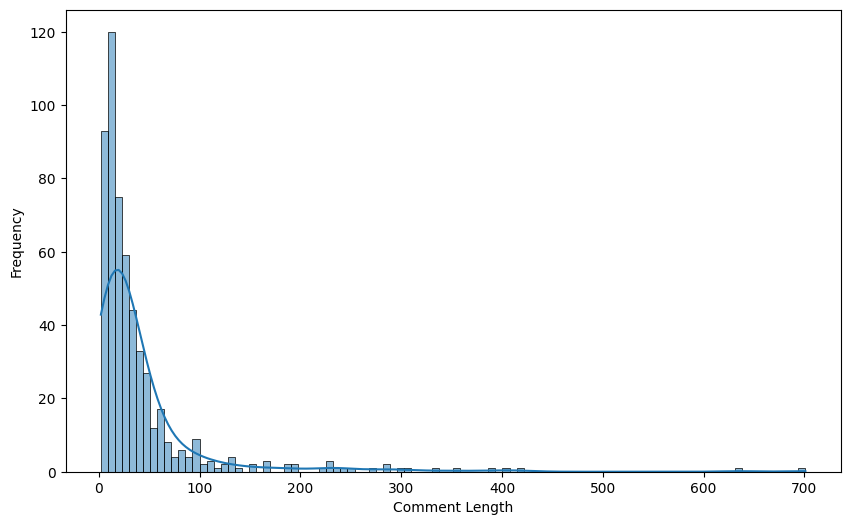

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
crypto_data['comment_length'] = crypto_data['Comment'].astype(str).apply(lambda x: len(x.split()))
plt.figure(figsize=(10, 6))
sns.histplot(crypto_data['comment_length'], bins=100, kde=True)
plt.xlabel('Comment Length')
plt.ylabel('Frequency')

#### Lets look at the second point

In [16]:
crypto_data[crypto_data.Comment.apply(lambda x:len(x.split()))>450]

Comment  \
51                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       Bitcoin is a great hedge against inflation because demand is growing, fiat keeps printing, yet there are fewer BTC put into existence each year as it trends toward 0.\n\nIf you buy 1BTC now for $30K and held for ten years - 1BTC be a lot more scarce and $30k will be worth a lot less. The same way the stock market or any asset can be a hedge against inflation. It usually counts on you selling as inflation happens not during the fallout after - crypto preformed extremely well in the last two years during the run up of the (lagging) CPI.\n\nEthereum is a hedge against inflation because people spend $20-80 million for its blockspace each DAY. It mints $30M in new coins which get sold each day to people who want blockspace. Next year it will mint $3M new coins each day forever after, and I'm taking the bet people will pay even more for blockspace in the future (by L2 compression protocols that batch 1000s into 1). Blockspace is finate and demand is strong, it's been a good bet to make so far.\n\nHere's a great site to compare POW and POS Ethereum. Something like a 2000x energy reduction sometime this year.\n\nBitcoin mining is done on specialized hardware so the economics of that are a lot different than GPU mining, and very strongly incentivize the new development of clean power. IMO large corporations having access to ~$0 energy while selling it for a cost isn't sustainable for true decentralization but whatever, it keeps coal mines from being profitable too if the hashrate can be inexpensively high.\nThe argument against it usually is that it allows existing mines to stay open longer by recycling their otherwise wasted energy into BTC which means they may not go bankrupt. That's still a step in the right direction compared to flaring it all into the sky though, and that BTC can be sent somewhere that has no power to create power (like oil is used).\n\nEvery 4 years the amount of new BTC minted per block is reduced by half, and the hashrate (security/difficulty to mine) is dependant on how many miners are trying to get the one block reward. That means if your costs 20K to mine a BTC that's worth 30K today, the next halving your costs will be 20K to receive 15K of BTC, and you would be forced to stop mining or find a cheaper alternative. If the price of BTC doubles than you are safe but (despite what btc maxis think) it can't double forever. It's a non-issue because it will solve itself. Ideally the costs from people buying blockspace (crypto fees) will be drastic enough to make up for today's prehalving inflation rate, which means a ton of POW being done to earn fees - but if today miners are already making the pivot to clean energy (and not by choice) I can't imagine in ~20 years it being any easier to use coal or otherwise.\n\nThe energy argument is a global one, picking just crypto is disingenuous because most people are completely ignorant about crypto so this is what they're taught. BTC is a legitimate currency in multiple Countries, crypto is used all over the world in places that don't have banks or face real inflation (Argentina), I spend it on cards in shops with and online too, VISA is using it because it's cheaper/faster than their existing rails, so is Stripe for the same reas

Two things we see that somehow even with less words some comments are genuine with less than 5 words we lose 30 datapoints given the requirement to build a sentiment classifier with ability to solve 10 million datapoints with a budget of 100$, losing 30 dapoints or less than 6 percent datapoint should not prove to be difficult

But before we go on to remove data let us solve some data challenges like punctuations, cleaning and emojis for sure

The small challenge I see is the data accuracy how sure can we be that the labels are 100 percent correct, do we have enough resources to train a separate model to identify if something is not in the right place?


The reason for this is the first comment above sentence on index 51 we can see the comment is definitely negative but somehow it is considered positive due to positive words

In [17]:
from transformers import pipeline
check_sentiments = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english", truncation=True)
sentiment=check_sentiments(crypto_data.Comment.tolist())

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cuda:0


In [18]:
sentiment[0]

{'label': 'POSITIVE', 'score': 0.9917324781417847}

In [19]:
crypto_data['new_sentiment']=[new['label'].lower() for new in sentiment]

In [20]:
crypto_data['prob']=[new['score'] for new in sentiment]

In [21]:
crypto_data[crypto_data.Comment.apply(lambda x:len(x.split()))>400]

Comment  \
51                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        Bitcoin is a great hedge against inflation because demand is growing, fiat keeps printing, yet there are fewer BTC put into existence each year as it trends toward 0.\n\nIf you buy 1BTC now for $30K and held for ten years - 1BTC be a lot more scarce and $30k will be worth a lot less. The same way the stock market or any asset can be a hedge against inflation. It usually counts on you selling as inflation happens not during the fallout after - crypto preformed extremely well in the last two years during the run up of the (lagging) CPI.\n\nEthereum is a hedge against inflation because people spend $20-80 million for its blockspace each DAY. It mints $30M in new coins which get sold each day to people who want blockspace. Next year it will mint $3M new coins each day forever after, and I'm taking the bet people will pay even more for blockspace in the future (by L2 compression protocols that batch 1000s into 1). Blockspace is finate and demand is strong, it's been a good bet to make so far.\n\nHere's a great site to compare POW and POS Ethereum. Something like a 2000x energy reduction sometime this year.\n\nBitcoin mining is done on specialized hardware so the economics of that are a lot different than GPU mining, and very strongly incentivize the new development of clean power. IMO large corporations having access to ~$0 energy while selling it for a cost isn't sustainable for true decentralization but whatever, it keeps coal mines from being profitable too if the hashrate can be inexpensively high.\nThe argument against it usually is that it allows existing mines to stay open longer by recycling their otherwise wasted energy into BTC which means they may not go bankrupt. That's still a step in the right direction compared to flaring it all into the sky though, and that BTC can be sent somewhere that has no power to create power (like oil is used).\n\nEvery 4 years the amount of new BTC minted per block is reduced by half, and the hashrate (security/difficulty to mine) is dependant on how many miners are trying to get the one block reward. That means if your costs 20K to mine a BTC that's worth 30K today, the next halving your costs will be 20K to receive 15K of BTC, and you would be forced to stop mining or find a cheaper alternative. If the price of BTC doubles than you are safe but (despite what btc maxis think) it can't double forever. It's a non-issue because it will solve itself. Ideally the costs from people buying blockspace (crypto fees) will be drastic enough to make up for today's prehalving inflation rate, which means a ton of POW being done to earn fees - but if today miners are already making the pivot to clean energy (and not by choice) I can't imagine in ~20 years it being any easier to use coal or otherwise.\n\nThe energy argument is a global one, picking just crypto is disingenuous because most people are completely ignorant about crypto so this is what they're taught. BTC is a legitimate currency in multiple Countries, crypto is used all over the world in places that don't have banks or face real inflation (Argentina), I spend it on cards in shops with and online too, VISA is using it because it's cheaper/faster than their existing rails, so is Stripe for the same rea

The transformer model is not able to detect properly and have more inconsistencies than before since we cannot rely on the transformer model we will have to either use a bigger model which will be resource intensive or use this only for bigger commets or for not lets keep it out of scope

NOTE: The future study based on sentiments must be done to check data quality as well

### Lets clean the data

We will do two type of cleaning


1.   For the smaller models keeping in mind tfidf based models
2.   For the larger models which dont need stop words removal (not in definite scope)



Based on a previous research most transformers based model dont do well with lemmatize and stop word removal so if we go with transformer architecture we might need only cleaned data

In [22]:
# doing some cleaning of punctuations
! pip install demoji
import pandas as pd
import re
import demoji
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 kB 3.8 MB/s eta 0:00:00


In [23]:
nltk.download('stopwords')
stopwords.words('english')
nltk.download('punkt')
nltk.download('punkt_tab')
word_tokenize("currencies are okay")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


['currencies', 'are', 'okay']

In [24]:
nltk.download('wordnet')
WordNetLemmatizer().lemmatize("currencies")

[nltk_data] Downloading package wordnet to /root/nltk_data...


'currency'

In [25]:
# sanity check
demoji.replace_with_desc('I am doing fine 😀👾',sep=' ')

'I am doing fine  grinning face  alien monster '

In [26]:
# lets take care of emojis

crypto_data['Comment_demojified']=crypto_data['Comment'].apply(lambda x:demoji.replace_with_desc(x,sep=' '))

In [27]:
def clean_text(text):
    text = text.lower()
    # removes punctuation.
    text = re.sub(r'[^a-z0-9\s_$.]', '', text)
    # to remove /n from the system
    text = text.replace("\n"," ")
    text = re.sub(r'\s+', ' ', text).strip()
    return text

In [28]:
crypto_data['Comment_demojified_cleaned']=crypto_data['Comment_demojified'].apply(lambda x:clean_text(x))

In [29]:
crypto_data.head()

,Comment,Sentiment,comment_length,new_sentiment,prob,Comment_demojified,Comment_demojified_cleaned
0,"I bought 2200 at the ico, at 0.50$ per coin. Hold everything and sold it 3 months ago and it helped me to buy a bigger house.",Positive,27,positive,0.991732,"I bought 2200 at the ico, at 0.50$ per coin. Hold everything and sold it 3 months ago and it helped me to buy a bigger house.",i bought 2200 at the ico at 0.50$ per coin. hold everything and sold it 3 months ago and it helped me to buy a bigger house.
1,"Harmony one , algorand , Cardano, solana , vechain gonna fly if there is ever a next bull market\n\nOtherwise just buy and stack satoshis",Positive,25,negative,0.995161,"Harmony one , algorand , Cardano, solana , vechain gonna fly if there is ever a next bull market\n\nOtherwise just buy and stack satoshis",harmony one algorand cardano solana vechain gonna fly if there is ever a next bull market otherwise just buy and stack satoshis
2,"Honestly, after reading this post and many of the responses, I have to conclude most of the crypto-space is totally fucked.\n\nThe consept of crypto has been entirely lost, waves of noobs arrive on crypto island, and instead of revelling in the freedom, do everything they can to plan their way to get back off of the island.",Negative,58,negative,0.999613,"Honestly, after reading this post and many of the responses, I have to conclude most of the crypto-space is totally fucked.\n\nThe consept of crypto has been entirely lost, waves of noobs arrive on crypto island, and instead of revelling in the freedom, do everything they can to plan their way to get back off of the island.",honestly after reading this post and many of the responses i have to conclude most of the cryptospace is totally fucked. the consept of crypto has been entirely lost waves of noobs arrive on crypto island and instead of revelling in the freedom do everything they can to plan their way to get back off of the island.
3,In bear market is where money is made. I Will continue to DCA to the assets i believe.,Positive,18,positive,0.816464,In bear market is where money is made. I Will continue to DCA to the assets i believe.,in bear market is where money is made. i will continue to dca to the assets i believe.
4,"Funny how people think Bitcoin's risk is comparable to stocks. A lot of these crypto ""investors"" are gonna learn the hard way sooner or later.",Negative,25,negative,0.914330,"Funny how people think Bitcoin's risk is comparable to stocks. A lot of these crypto ""investors"" are gonna learn the hard way sooner or later.",funny how people think bitcoins risk is comparable to stocks. a lot of these crypto investors are gonna learn the hard way sooner or later.


Commet demojified clean is the data we can use for systems like transformers now lets make this data for small models which will remove stopwords and

In [30]:
def lemmatize(text):
    tokens = word_tokenize(text)
    lemmatizer = WordNetLemmatizer()
    stop_words_english = set(stopwords.words('english'))
    cleaned_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words_english and len(word) > 1]
    text = " ".join(cleaned_tokens)
    return text

In [31]:
crypto_data['Comment_demojified_cleaned_all_processed']=crypto_data['Comment_demojified_cleaned'].apply(lambda x:lemmatize(x))

In [32]:
crypto_data.head()

,Comment,Sentiment,comment_length,new_sentiment,prob,Comment_demojified,Comment_demojified_cleaned,Comment_demojified_cleaned_all_processed
0,"I bought 2200 at the ico, at 0.50$ per coin. Hold everything and sold it 3 months ago and it helped me to buy a bigger house.",Positive,27,positive,0.991732,"I bought 2200 at the ico, at 0.50$ per coin. Hold everything and sold it 3 months ago and it helped me to buy a bigger house.",i bought 2200 at the ico at 0.50$ per coin. hold everything and sold it 3 months ago and it helped me to buy a bigger house.,bought 2200 ico 0.50 per coin hold everything sold month ago helped buy bigger house
1,"Harmony one , algorand , Cardano, solana , vechain gonna fly if there is ever a next bull market\n\nOtherwise just buy and stack satoshis",Positive,25,negative,0.995161,"Harmony one , algorand , Cardano, solana , vechain gonna fly if there is ever a next bull market\n\nOtherwise just buy and stack satoshis",harmony one algorand cardano solana vechain gonna fly if there is ever a next bull market otherwise just buy and stack satoshis,harmony one algorand cardano solana vechain gon na fly ever next bull market otherwise buy stack satoshis
2,"Honestly, after reading this post and many of the responses, I have to conclude most of the crypto-space is totally fucked.\n\nThe consept of crypto has been entirely lost, waves of noobs arrive on crypto island, and instead of revelling in the freedom, do everything they can to plan their way to get back off of the island.",Negative,58,negative,0.999613,"Honestly, after reading this post and many of the responses, I have to conclude most of the crypto-space is totally fucked.\n\nThe consept of crypto has been entirely lost, waves of noobs arrive on crypto island, and instead of revelling in the freedom, do everything they can to plan their way to get back off of the island.",honestly after reading this post and many of the responses i have to conclude most of the cryptospace is totally fucked. the consept of crypto has been entirely lost waves of noobs arrive on crypto island and instead of revelling in the freedom do everything they can to plan their way to get back off of the island.,honestly reading post many response conclude cryptospace totally fucked consept crypto entirely lost wave noobs arrive crypto island instead revelling freedom everything plan way get back island
3,In bear market is where money is made. I Will continue to DCA to the assets i believe.,Positive,18,positive,0.816464,In bear market is where money is made. I Will continue to DCA to the assets i believe.,in bear market is where money is made. i will continue to dca to the assets i believe.,bear market money made continue dca asset believe
4,"Funny how people think Bitcoin's risk is comparable to stocks. A lot of these crypto ""investors"" are gonna learn the hard way sooner or later.",Negative,25,negative,0.914330,"Funny how people think Bitcoin's risk is comparable to stocks. A lot of these crypto ""investors"" are gonna learn the hard way sooner or later.",funny how people think bitcoins risk is comparable to stocks. a lot of these crypto investors are gonna learn the hard way sooner or later.,funny people think bitcoins risk comparable stock lot crypto investor gon na learn hard way sooner later


Now lets check the length of new cleaned data

In [33]:
crypto_data['len_new']=crypto_data['Comment_demojified_cleaned_all_processed'].apply(lambda x:len(x.split()))

In [34]:
for i in range(1,20):
    total_comments=(crypto_data.Comment_demojified_cleaned_all_processed.apply(lambda x:len(x.split())).sort_values(ascending=True)<i).sum()
    print(f'Number of comments with less than {i} words are {total_comments}')

Number of comments with less than 1 words are 0
Number of comments with less than 2 words are 4
Number of comments with less than 3 words are 22
Number of comments with less than 4 words are 52
Number of comments with less than 5 words are 81
Number of comments with less than 6 words are 113
Number of comments with less than 7 words are 152
Number of comments with less than 8 words are 190
Number of comments with less than 9 words are 215
Number of comments with less than 10 words are 237
Number of comments with less than 11 words are 253
Number of comments with less than 12 words are 270
Number of comments with less than 13 words are 292
Number of comments with less than 14 words are 311
Number of comments with less than 15 words are 330
Number of comments with less than 16 words are 338
Number of comments with less than 17 words are 349
Number of comments with less than 18 words are 374
Number of comments with less than 19 words are 385


In [38]:
crypto_data[crypto_data.Comment_demojified_cleaned_all_processed.apply(lambda x:len(x.split()))<6].head(3)

,Comment,Sentiment,comment_length,new_sentiment,prob,Comment_demojified,Comment_demojified_cleaned,Comment_demojified_cleaned_all_processed,len_new
8,Fuck Do Kwon and his 2.0 version,Negative,7,negative,0.997921,Fuck Do Kwon and his 2.0 version,fuck do kwon and his 2.0 version,fuck kwon 2.0 version,4
10,it can drop another 80%!,Negative,5,negative,0.983552,it can drop another 80%!,it can drop another 80,drop another 80,3
11,I have never stoped buying. Now I am buying more.,Positive,10,positive,0.999227,I have never stoped buying. Now I am buying more.,i have never stoped buying. now i am buying more.,never stoped buying buying,4


For a good baseline model data with 3 or less words after correction or 5 or less words before correction might not be fruitful hence removing with total length less than or equal to 3

In [47]:
crypto_data.Sentiment.value_counts()

,count
Sentiment,
Positive,296
Negative,256


No inconsistencies in sentiment here

In [41]:
# A all cleaned data for smaller base level models
crypto_data_base=crypto_data[crypto_data.len_new>3][['Comment_demojified_cleaned_all_processed','Sentiment']]

In [44]:
crypto_data_base.head(3)

,Comment_demojified_cleaned_all_processed,Sentiment
0,bought 2200 ico 0.50 per coin hold everything sold month ago helped buy bigger house,Positive
1,harmony one algorand cardano solana vechain gon na fly ever next bull market otherwise buy stack satoshis,Positive
2,honestly reading post many response conclude cryptospace totally fucked consept crypto entirely lost wave noobs arrive crypto island instead revelling freedom everything plan way get back island,Negative


In [48]:
crypto_data_base.Sentiment.value_counts()

,count
Sentiment,
Positive,268
Negative,232


In [46]:
# since we do not want to disturb punctuations and most context we will use only till demojified and basic cleaning
crypto_data_transformer=crypto_data[crypto_data.comment_length>=5][['Comment_demojified_cleaned','Sentiment']]

In [45]:
crypto_data_transformer.head(3)

,Comment_demojified_cleaned,Sentiment
0,i bought 2200 at the ico at 0.50$ per coin. hold everything and sold it 3 months ago and it helped me to buy a bigger house.,Positive
1,harmony one algorand cardano solana vechain gonna fly if there is ever a next bull market otherwise just buy and stack satoshis,Positive
2,honestly after reading this post and many of the responses i have to conclude most of the cryptospace is totally fucked. the consept of crypto has been entirely lost waves of noobs arrive on crypto island and instead of revelling in the freedom do everything they can to plan their way to get back off of the island.,Negative


In [49]:
crypto_data_transformer.Sentiment.value_counts()

,count
Sentiment,
Positive,280
Negative,242


Same consistency of POsitive and Negative Comments

### Saving Data

In [50]:
crypto_data_base.to_csv('crypto_data_base.csv',index=False)
crypto_data_transformer.to_csv('crypto_data_transformer.csv',index=False)